### Importing Libraries

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes


### Data Reading 

In [45]:
df = pd.read_csv('/home/manan/Desktop/Research/Learning-Perspectives/code/bstr.txt', sep=" ")

# changing the value of heads using the values in teacher's note
teachers_keywords = "/home/manan/Desktop/Research/Learning-Perspectives/data/data_notes/79n.txt"
heads = set()
openfile = open(teachers_keywords,'r')
readtext = openfile.read()
# reading into head
a = ""
for i in readtext:
    if i!=',':
        a = a+i
    else:
        heads.add(a)
        a = ""
heads.add("null")
# changin colomuns into head
df.columns = heads
# cleaning
df = df.drop(columns="sprint backlog advantages ",axis=0)

In [46]:
print(df.columns)

Index(['sprint planning meeting ', 'specific roles ', 'team doesnt ',
       'developers team addresses ', 'potential users ', 'needs oo ',
       'previous sprint ', 'work oo ', 'scope creep ', 'team members ',
       ...
       'unnecessary activity ', 'teams workflow ', 'high importance ',
       'early delivery oo encourages ',
       'frequent releases featuredriven development ', 'good design results ',
       'development time ', 'lean principles aim ',
       'release cycle oo collaboration ', 'constant feedback '],
      dtype='object', length=183)


In [47]:
print(df.head())

   sprint planning meeting   specific roles   team doesnt   \
0                         0                0             0   
1                         0                0             0   
2                         0                0             0   
3                         0                0             0   
4                         0                0             0   

   developers team addresses   potential users   needs oo   previous sprint   \
0                           0                 0          0                 0   
1                           0                 0          0                 0   
2                           0                 0          0                 0   
3                           0                 0          0                 0   
4                           0                 0          0                 0   

   work oo   scope creep   team members   ...  unnecessary activity   \
0         0             0              0  ...                      0   
1 

### Data Inspection

In [48]:
df.shape

(92, 183)

In [49]:
df.describe

<bound method NDFrame.describe of     sprint planning meeting   specific roles   team doesnt   \
0                          0                0             0   
1                          0                0             0   
2                          0                0             0   
3                          0                0             0   
4                          0                0             0   
..                       ...              ...           ...   
87                         0                0             0   
88                         0                0             0   
89                         0                0             0   
90                         0                0             0   
91                         0                0             0   

    developers team addresses   potential users   needs oo   previous sprint   \
0                            0                 0          0                 0   
1                            0                 

### Using K-Mode with "Cao" initialization

In [50]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 798.0


In [56]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [58]:
clusterCentroidsDf

,sprint planning meeting,specific roles,team doesnt,developers team addresses,potential users,needs oo,previous sprint,work oo,scope creep,team members,...,unnecessary activity,teams workflow,high importance,early delivery oo encourages,frequent releases featuredriven development,good design results,development time,lean principles aim,release cycle oo collaboration,constant feedback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,1,1,0,0,0,...,0,1,0,1,0,0,0,1,1,0


### Using K-Mode with "Huang" initialization

In [59]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 748.0
Run 1, iteration: 2/100, moves: 9, cost: 748.0


In [60]:
fitClusters_huang

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1], dtype=uint16)

### Testing Using Elbow Method

In [67]:
cost = []
for num_clusters in list(range(1,15)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 897.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 798.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 724.0
Run 1, iteration: 2/100, moves: 0, cost: 724.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 715.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 619.0
Run 1, iteration: 2/100, moves: 0, cost: 619.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 577.0
Run 1, iteration: 2/100, moves: 0, cost: 577.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration:

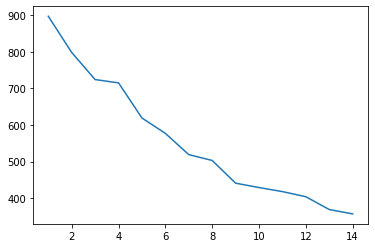

In [68]:
y = np.array([i for i in range(1,15)])
plt.plot(y,cost)

#### Value aroud 9-10 seems to be working fine

In [70]:
km_cao = KModes(n_clusters=9, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 441.0
Run 1, iteration: 2/100, moves: 1, cost: 441.0


In [71]:
fitClusters_cao

array([8, 0, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 7, 8, 0, 0, 8, 0, 0, 0, 0, 0,
       0, 8, 8, 6, 0, 6, 4, 4, 8, 0, 2, 6, 0, 0, 6, 4, 0, 0, 4, 4, 4, 0,
       0, 6, 2, 8, 0, 0, 4, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0, 6, 0, 0, 0, 4,
       3, 4, 0, 0, 0, 0, 8, 0, 8, 0, 0, 0, 1, 8, 4, 0, 0, 8, 0, 8, 0, 8,
       0, 6, 6, 0], dtype=uint16)

In [72]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [73]:
clusterCentroidsDf

,sprint planning meeting,specific roles,team doesnt,developers team addresses,potential users,needs oo,previous sprint,work oo,scope creep,team members,...,unnecessary activity,teams workflow,high importance,early delivery oo encourages,frequent releases featuredriven development,good design results,development time,lean principles aim,release cycle oo collaboration,constant feedback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,1,1,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
